# Convolutional Neural Network for Image Recognition

In this example we will present building and traing a convolutiontinal neural network for image recognition. 

First of all we will import the NumPy library and assigns it the alias np.

In [148]:
import numpy as np

#### Importing dataset

Then we will import the CIFAR-10 dataset module from the keras.datasets package.

In [149]:
from keras.datasets import cifar10

#### Loading data

Using the following code we can load the CIFAR-10 dataset and splits it into training and test sets. Unpacking the Data the method returns two tuples:

The first tuple contains the training data: (x_train, y_train).
The second tuple contains the test data: (x_test, y_test).

x_train and x_test are variables hold the images of the training and test sets, respectively.

y_train and y_test are variables hold the labels of the training and test sets, respectively.

In [150]:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()

In [151]:
x_train.shape

(50000, 32, 32, 3)

We have 50,000 images, 32 x 32 pixels of 3 colors (RGB) for training.

In [152]:
x_test.shape

(10000, 32, 32, 3)

We have 10,000 images, 32 x 32 pixels of 3 colors (RGB) for testing.

In [153]:
import matplotlib.pyplot as plt

Using the package matplotlib will display the first image in the x_train array from the training dataset.

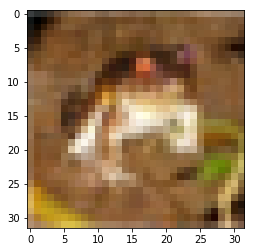

In [154]:
plt.imshow(x_train[0])

Simillartly we can display for example the 10th immage of the testing dataset.

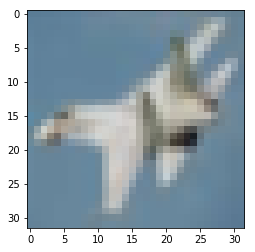

In [155]:
plt.imshow(x_test[10])

#### Normalizing

In [156]:
x_train.max()

255

In [157]:
x_test.max()

255

In [158]:
x_train = x_train/255
x_test = x_test/255

In [159]:
x_train.max()

1.0

In [160]:
x_test.max()

1.0

Now we see that the maximal values do not exaggerate the 1s.

#### Converting labels

In [119]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [120]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

We have labels from 0 to 10, which means airplane, car, bird, cat, deer, dog, frog, horse, ship, and truck.

The folowing lines convert the integer labels y_train and y_test into one-hot encoded format.

One-hot encoding is a method used to convert categorical data into a binary (0 or 1) matrix. Each category or class is represented as a binary vector with a length equal to the number of classes. In this vector, all the elements are 0 except for the one at the index corresponding to the class, which is 1.

The number 10 in function represents 10 classes. The conversion yelds in the following matrix.

        cars  birds cats  deer  dogs  frogs horses ships trucks
cars      1     0     0     0     0     0     0     0     0
birds     0     1     0     0     0     0     0     0     0
cats      0     0     1     0     0     0     0     0     0
deer      0     0     0     1     0     0     0     0     0
dogs      0     0     0     0     1     0     0     0     0
frogs     0     0     0     0     0     1     0     0     0
horses    0     0     0     0     0     0     1     0     0
ships     0     0     0     0     0     0     0     1     0
trucks    0     0     0     0     0     0     0     0     1


In [133]:
from keras.utils import to_categorical

In [134]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

#### Building a model

Now we are going to build a neural network.

Firstly we will imports the sequential class from the keras.models module. The sequential class is used to create a linear stack of layers for building neural network models.

Then we will import specific layer types
- Dense Layer
- Conv2D Layer
- MaxPool2D Layer
- Flatten Layer

These layers are building blocks used to construct neural network architectures:
- Dense: in other words fully connected layer in which every neuron connected to every neuron in the preceding layer.
- Conv2D: Convolutional layer for 2D spatial convolution over images. Convolution is the continuous a sum of the product of two functions after one of them moves across the image and is called a kernel. Convolutional layers consist of a set of kernels.
- MaxPool2D: A pooling layer for 2D spatial data typically used after convolutional layers. It is used to downsample the spatial dimensions by reducing their size while retaining important information. Here few pixes are replaced by one pixel of the maximal value among them.
- Flatten: Layer: Flattens the data into a one-dimensional array used to connect convolutional layers to fully connected layers.

In [135]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [137]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutiotional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten layer (Converts 28 x 28 2D array intoto 764 1D Array)
model.add(Flatten())

# Dense hidden layer
model.add(Dense(256, activation='relu'))

# Clasifier
model.add(Dense(10, activation='softmax'))

#### Compiling The Model

We will compile the model using the followitng command.

In [138]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

The meaning of the parameter have the following meanings 

loss='categorical_crossentropy' specifies the loss function to be used during training. In this case, it's categorical cross-entropy. It measures the dissimilarity between the true labels and the predicted probability distribution across all classes.

When using categorical cross-entropy, the model's output layer typically has a softmax activation function optimizer='rmsprop'. This specifies the optimization algorithm to be used for training the model. In this case, it's RMSprop - Root Mean Square Propagation). It is an adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter based on the magnitude of its gradients.

Metrics specifies the evaluation metrics to be used during training and testing. In this case, it's accuracy.

Bellow is the summary of the model. This summary gives an overview of each layer in the model, showing how data flows through the network and how the dimensions and number of parameters change at each layer.

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total para

#### Training the model

We have selected 10 epoch. During each epoch the model performs forward and backward passes on the training data to adjust the weights and minimize the loss function.

In [161]:
model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 50s 999us/step - loss: 0.5068 - acc: 0.8286
Epoch 2/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4739 - acc: 0.8404
Epoch 3/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4419 - acc: 0.8489
Epoch 4/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.4252 - acc: 0.8572
Epoch 5/10
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3928 - acc: 0.8666
Epoch 6/10
50000/50000 [==============================] - 46s 924us/step - loss: 0.3810 - acc: 0.8724
Epoch 7/10
50000/50000 [==============================] - 48s 951us/step - loss: 0.3548 - acc: 0.8835
Epoch 8/10
50000/50000 [==============================] - 49s 971us/step - loss: 0.3426 - acc: 0.8873
Epoch 9/10
50000/50000 [==============================] - 55s 1ms/step - loss: 0.3346 - acc: 0.8926
Epoch 10/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.3208 - acc

#### Evaluation

In [162]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 4s 365us/step


[1.8710919101715089, 0.6476]

In [163]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(y_test,model.predict_classes(x_test)))

             precision    recall  f1-score   support

          0       0.60      0.75      0.67      1000
          1       0.87      0.68      0.76      1000
          2       0.65      0.47      0.54      1000
          3       0.43      0.51      0.47      1000
          4       0.57      0.64      0.60      1000
          5       0.50      0.58      0.54      1000
          6       0.84      0.65      0.73      1000
          7       0.66      0.78      0.71      1000
          8       0.82      0.68      0.74      1000
          9       0.74      0.74      0.74      1000

avg / total       0.67      0.65      0.65     10000



The summary table shows that model's performance varies across classes, with precision ranging from 0.43 to 0.87 and recall from 0.47 to 0.78. Notably, the model performs best on class 1 with a precision of 0.87 and on class 7 with a recall of 0.78. The lowest performance is observed for class 3 with a precision of 0.43 and for class 2 with a recall of 0.47. Each class in the dataset has 1000 instances, indicating a balanced dataset. The report highlights that while the model performs reasonably well, there is room for improvement, particularly in increasing recall and precision for certain classes.